In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"RESULTS_9448/snp_annotation.txt", sep='\t')
df

,locus,chr,pos,ID,ALT_FREQS,snp_conseq,snp_conseq_gene,phred,coding_snp,chr_hg38,pos_hg38,code_gtex,eqtl,eqtl_tissue,sqtl,sqtl_tissue,positional_mapping,source_finalGenes,geneList
0,1:102582081,1.0,102582081.0,rs17437455,0.2358,intergenic,NaN,0.860,NaN,chr1,102116525.0,1_102116525_,OLFM3,Brain_Caudate_basal_ganglia,NaN,NaN,Not_done,sqtl+eqtl+cadd,OLFM3
1,1:103584570,1.0,103584570.0,rs11802357,0.2674,intergenic,NaN,0.770,NaN,chr1,103119014.0,1_103119014_,"COL11A1,COL11A1,COL11A1","Cells_Cultured_fibroblasts,Nerve_Tibial,Skin_S...",NaN,NaN,Not_done,sqtl+eqtl+cadd,COL11A1
2,1:10566215,1.0,10566215.0,rs616488,0.2682,intron,PEX14,1.668,NaN,chr1,10506158.0,1_10506158_,"KIF1B,PEX14,PEX14,PEX14,PEX14,PEX14,PGD,PGD,DF...","Muscle_Skeletal,Adipose_Subcutaneous,Adipose_V...",NaN,NaN,Not_done,sqtl+eqtl+cadd,"KIF1B,PEX14,PGD,DFFA,CENPS"
3,1:106110114,1.0,106110114.0,rs2138471,0.3776,intergenic,NaN,0.579,NaN,chr1,105567492.0,1_105567492_,LINC01676,Testis,NaN,NaN,Not_done,sqtl+eqtl+cadd,LINC01676
4,1:108294324,1.0,108294324.0,rs12129687,0.3976,intron,VAV3,3.992,NaN,chr1,107751702.0,1_107751702_,"VAV3,VAV3","Thyroid,Whole_Blood",NaN,NaN,Not_done,sqtl+eqtl+cadd,VAV3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2119,NaN,NaN,NaN,rs763706897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2120,NaN,NaN,NaN,rs1416569834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2121,NaN,NaN,NaN,rs775680252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2122,NaN,NaN,NaN,rs1351333193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df['snp_conseq'].value_counts()

intergenic           564
intron               535
regulatory           491
intron,non_coding    173
downstream           137
upstream             107
missense              40
3_prime_UTR           14
non_coding_exon       13
synonymous            11
stop_gained            6
intron,NMD             4
splice,missense        2
splice,intron          2
NMD,3_prime_UTR        1
Name: snp_conseq, dtype: int64

In [4]:
tissues =  df['eqtl_tissue'].dropna().str.split(',').explode()
len(tissues)

49028

In [5]:
tissues.value_counts()

Thyroid                                  2470
Skin_Sun_Exposed_Lower_leg               2226
Nerve_Tibial                             2221
Adipose_Subcutaneous                     2073
Artery_Tibial                            1989
Skin_Not_Sun_Exposed_Suprapubic          1925
Esophagus_Mucosa                         1872
Cells_Cultured_fibroblasts               1869
Whole_Blood                              1861
Testis                                   1828
Muscle_Skeletal                          1750
Lung                                     1722
Esophagus_Muscularis                     1638
Adipose_Visceral_Omentum                 1450
Artery_Aorta                             1446
Colon_Transverse                         1192
Breast_Mammary_Tissue                    1189
Heart_Atrial_Appendage                   1157
Esophagus_Gastroesophageal_Junction      1108
Heart_Left_Ventricle                     1065
Colon_Sigmoid                            1041
Brain_Cerebellum                  

In [6]:
genes =  df['geneList'].dropna().str.split(',').explode()
len(genes)


7865

In [7]:
# Load the DEG data
deg_file = "FUMA_gene2func529772/gtex_v8_ts_general_DEG.txt"
df = pd.read_csv(deg_file, sep="\t")

# Filter for upregulated genes in breast tissue
breast_df = df[df['GeneSet'] == 'Breast']

In [8]:
breast_df

,Category,GeneSet,N_genes,N_overlap,p,adjP,genes
6,DEG.up,Breast,1978,171,1.858823e-17,5.576470e-16,ENSG00000142798:ENSG00000158966:ENSG0000018458...
36,DEG.down,Breast,1007,77,2.522367e-06,7.567100e-05,ENSG00000069424:ENSG00000168389:ENSG0000015719...
66,DEG.twoside,Breast,2985,248,4.926674e-23,1.478002e-21,ENSG00000069424:ENSG00000142798:ENSG0000016838...


In [9]:
up_genes = breast_df[breast_df['Category'] == 'DEG.up']['genes'].str.split(':').explode().to_list()


DEg Up resgulated

In [10]:
# Load the average TPM data
tpm_file = "FUMA_gene2func529772/gtex_v8_ts_general_avg_log2TPM_exp.txt"
tpm_df = pd.read_csv(tpm_file, sep="\t")

# Filter TPM data for the upregulated genes
up_expression = tpm_df[tpm_df['ensg'].isin(up_genes)]

# Convert the matrix to a DataFrame, set gene symbols as index, and drop unnecessary columns
data_df = up_expression.set_index('symbol').drop(columns=['ensg'])
data_df

,Adipose_Tissue,Adrenal_Gland,Bladder,Blood,Blood_Vessel,Brain,Breast,Cervix_Uteri,Colon,Esophagus,...,Prostate,Salivary_Gland,Skin,Small_Intestine,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina
symbol,,,,,,,,,,,,,,,,,,,,,
HSPG2,5.669658,5.308689,5.668725,0.691345,5.672039,1.191269,5.626850,5.588230,5.458504,5.363211,...,5.462107,5.284225,5.241250,5.128430,4.899648,5.328919,3.711955,5.649179,5.667721,5.423969
CACHD1,4.316348,4.044929,3.667727,0.248559,3.301268,3.100527,4.492514,4.694892,2.491651,3.060651,...,4.087195,3.217350,3.698233,2.737449,3.122020,3.261517,2.724589,3.946639,4.859570,4.444769
PDE4B,3.552186,1.338257,2.372646,3.009246,3.444469,3.925729,3.652510,2.738372,2.146836,1.903627,...,3.635958,3.217503,2.909467,3.220890,4.014708,1.707519,2.107927,3.077330,1.977254,2.412348
ST6GALNAC3,2.991816,1.251675,1.828509,1.304379,1.565475,1.734093,2.820080,1.958938,1.577009,1.377235,...,1.329266,1.069961,0.704956,1.411047,1.470360,1.261193,0.433171,3.430992,2.637835,1.652692
ODF2L,3.553715,3.004206,3.162294,1.533915,2.665565,2.478013,3.785642,3.902209,3.084712,2.778287,...,3.525903,3.005206,2.956610,3.529668,4.086189,2.068195,2.933696,4.048854,3.803326,3.516347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CYYR1,5.456052,5.464368,4.372815,0.887560,3.544982,2.264954,5.421242,4.687790,3.660869,3.823041,...,4.201022,3.453253,2.408274,3.851800,5.089923,3.396555,2.323248,4.956757,5.295801,4.113841
ERG,4.721488,2.209686,3.196395,0.588208,4.977500,1.553051,4.575899,3.893539,2.625647,2.816240,...,3.130215,2.259867,1.878667,2.906627,4.760351,2.334672,1.809369,3.956670,4.311332,3.261048
BACE2,4.142112,1.786819,4.009057,0.782939,5.062799,1.183283,4.168012,4.217979,3.711062,3.842091,...,4.585446,5.177861,3.544688,3.465597,3.418561,4.310205,2.119407,3.854669,4.341794,3.894211


In [11]:
data_df.to_csv('Breast_tissue_DE_up_genes.csv', header=True, index=False)

In [12]:
# Load the average TPM data
tpm_file = "FUMA_gene2func529772/gtex_v8_ts_general_avg_log2TPM_exp.txt"
tpm_df = pd.read_csv(tpm_file, sep="\t")

# Filter TPM data for the upregulated genes
up_expression = tpm_df[tpm_df['ensg'].isin(up_genes)]

# Convert the matrix to a DataFrame, set gene symbols as index, and drop unnecessary columns
data_df = up_expression.set_index('symbol').drop(columns=['ensg'])

# Sort the DataFrame based on the values of "Breast" in descending order
sorted_data_df = data_df.sort_values(by="Breast", ascending=False)

# Normalize the data using min-max normalization
normalized_data_df = (sorted_data_df - sorted_data_df.min()) / (sorted_data_df.max() - sorted_data_df.min())

normalized_data_df = normalized_data_df[normalized_data_df['Breast']>=0.8]
up_genes = normalized_data_df.index.to_list()
len(up_genes)

65

In [13]:
# simple plotting function
import os
# %matplotlib inline
# %config InlineBackend.figure_format='retina' # mac
%load_ext autoreload
%autoreload 2
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt
# simple plotting function
from gseapy import barplot, dotplot
# backgound only reconigized a gene list input.
enr_bg = gp.enrichr(gene_list=up_genes,
                 gene_sets=['MSigDB_Hallmark_2020','KEGG_2021_Human'],
                 organism='human', # organism argment is ignored because user input a background
                 outdir=None, # don't write to disk
                )


enr_bg.results

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,MSigDB_Hallmark_2020,Epithelial Mesenchymal Transition,8/200,2.692836e-07,0.000008,0,0,14.432018,218.320358,CXCL12;PRRX1;IGFBP3;ANPEP;COL12A1;VEGFC;COL6A3...
1,MSigDB_Hallmark_2020,Estrogen Response Early,6/200,4.690961e-05,0.000453,0,0,10.348244,103.143927,SCARB1;CXCL12;MYOF;INHBB;SLC7A2;MED13L
2,MSigDB_Hallmark_2020,KRAS Signaling Up,6/200,4.690961e-05,0.000453,0,0,10.348244,103.143927,PRRX1;GYPC;IGFBP3;SPRY2;TRIB2;ETS1
3,MSigDB_Hallmark_2020,Hypoxia,5/200,4.829704e-04,0.002801,0,0,8.435897,64.412760,SCARB1;IGFBP3;GBE1;IRS2;ETS1
4,MSigDB_Hallmark_2020,Adipogenesis,5/200,4.829704e-04,0.002801,0,0,8.435897,64.412760,SCARB1;GBE1;UCP2;LPL;CD36
...,...,...,...,...,...,...,...,...,...,...
144,KEGG_2021_Human,Human cytomegalovirus infection,1/225,5.212510e-01,0.539225,0,0,1.374930,0.895800,CXCL12
145,KEGG_2021_Human,Coronavirus disease,1/232,5.321600e-01,0.545805,0,0,1.332792,0.840740,VWF
146,KEGG_2021_Human,Chemical carcinogenesis,1/239,5.428242e-01,0.552025,0,0,1.293133,0.790065,CYP1B1
147,KEGG_2021_Human,Shigellosis,1/246,5.532490e-01,0.557645,0,0,1.255740,0.743332,FOXO1


In [69]:
enr_bg.results.columns

Index(['Gene_set', 'Term', 'Overlap', 'P-value', 'Adjusted P-value',
       'Old P-value', 'Old Adjusted P-value', 'Odds Ratio', 'Combined Score',
       'Genes'],
      dtype='object')

In [70]:
enr_bg.results.to_csv('DEG_up_genes_pathways.csv', header=True, index=False)

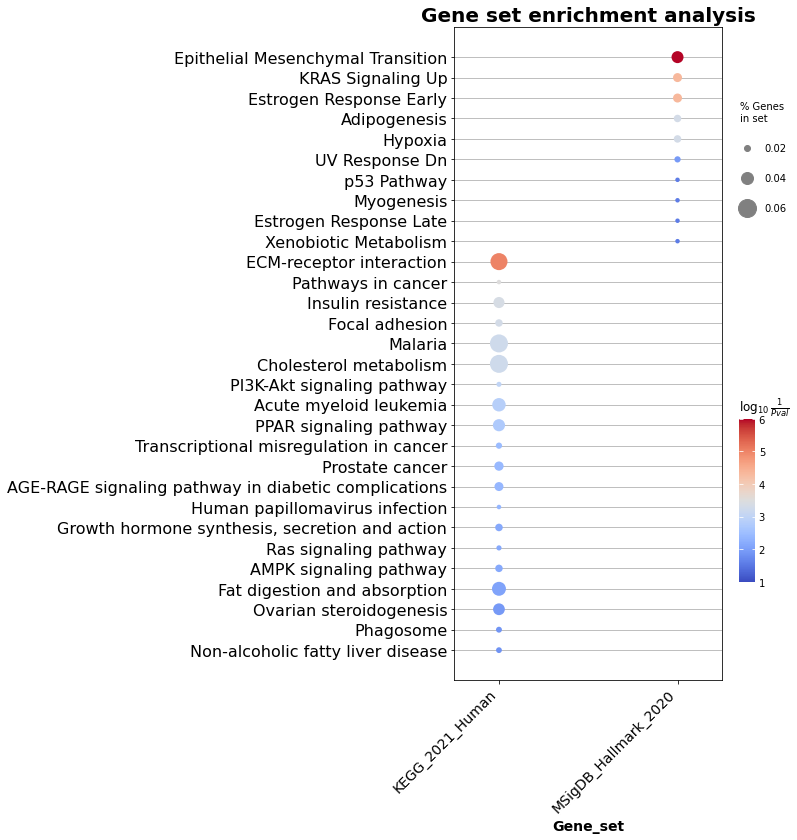

In [71]:
# categorical scatterplot
ax = dotplot(enr_bg.results,
              column="P-value",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=50,
              top_term=20,
              figsize=(6,12),
              title = "Gene set enrichment analysis",
              cmap='coolwarm',
              xticklabels_rot=45, # rotate xtick labels
              show_ring=False, # set to False to revmove outer ring
             )

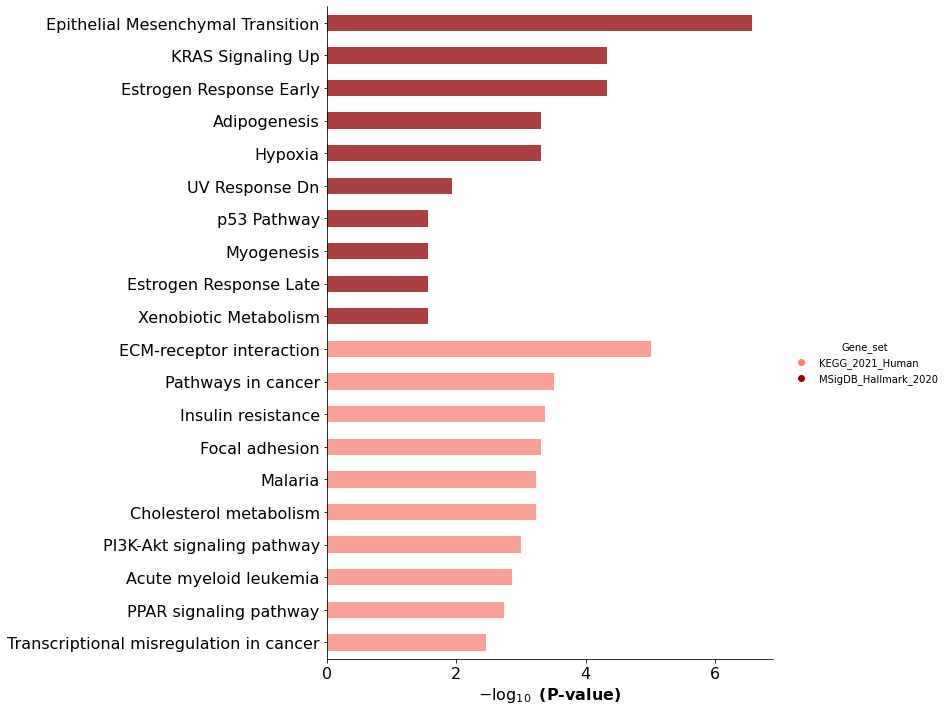

In [72]:
import matplotlib.pyplot as plt
# simple plotting function
from gseapy import barplot, dotplot

ax = barplot(enr_bg.results,
              column="P-value",
              group='Gene_set', # set group, so you could do a multi-sample/library comparsion
              size=10,
              top_term=10,
              figsize=(8,12),
              #color=['darkred', 'darkblue'] # set colors for group
              color = {'KEGG_2021_Human': 'salmon', 'MSigDB_Hallmark_2020':'darkred'}
             )


DEG down genes breast tissye

In [56]:
down_genes = breast_df[breast_df['Category'] == 'DEG.down']['genes'].str.split(':').explode().to_list()

In [57]:
# Load the average TPM data
tpm_file = "FUMA_gene2func529772/gtex_v8_ts_general_avg_log2TPM_exp.txt"
tpm_df = pd.read_csv(tpm_file, sep="\t")

# Filter TPM data for the upregulated genes
down_expression = tpm_df[tpm_df['ensg'].isin(down_genes)]

# Convert the matrix to a DataFrame, set gene symbols as index, and drop unnecessary columns
data_df = down_expression.set_index('symbol').drop(columns=['ensg'])
data_df

,Adipose_Tissue,Adrenal_Gland,Bladder,Blood,Blood_Vessel,Brain,Breast,Cervix_Uteri,Colon,Esophagus,...,Prostate,Salivary_Gland,Skin,Small_Intestine,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina
symbol,,,,,,,,,,,,,,,,,,,,,
KCNAB2,3.377322,2.585342,3.107724,5.388071,2.726831,5.007651,2.883619,2.728144,2.894551,2.598857,...,2.747548,2.475391,2.685617,4.022581,5.512939,2.198663,2.805989,2.825085,3.041432,2.516687
MFSD2A,1.778545,0.599967,1.850038,1.794714,0.786634,3.455218,2.067640,2.193772,2.795000,2.232410,...,1.883766,2.132486,4.789796,3.910016,1.692436,1.354479,5.507877,3.488032,2.107394,4.011244
LRP8,1.555586,1.335261,1.461159,1.647888,2.061979,3.200769,1.546836,1.808187,1.167236,1.778380,...,1.504663,1.392931,1.885757,1.841642,2.282390,0.982586,5.307163,4.960021,1.768372,2.191957
TTLL7,2.289020,0.820119,3.555197,0.153286,5.101427,4.197594,2.035866,2.706198,2.769679,3.136670,...,3.399099,2.481598,1.446451,2.072982,1.128852,2.723601,3.208648,2.343030,3.770588,2.572016
SPRR1A,0.635115,0.933611,2.274351,0.472716,0.703740,0.418772,0.681549,1.844891,0.679816,3.131043,...,1.013399,2.759134,4.355702,0.847149,0.984339,1.433284,0.869629,0.722168,0.995186,4.636914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CDH19,1.502980,1.356140,3.083984,0.037165,2.287219,1.293105,1.485617,3.349755,3.979828,3.315930,...,2.695975,2.526226,1.377837,2.541397,1.128409,2.346063,0.969249,1.557688,1.303170,2.986790
WDR62,0.801350,0.695369,0.746205,1.356205,0.605877,0.649560,0.940561,1.183258,0.922061,1.082674,...,0.926667,1.127003,2.343339,1.608428,2.199710,0.853411,5.653120,1.002859,1.161359,1.777433
PPFIA3,1.879765,2.607593,1.825238,0.589346,1.607701,4.580794,2.337030,2.231332,2.419256,2.843868,...,3.093461,2.810176,4.201075,2.468094,2.087998,1.974758,3.003403,2.726568,2.336286,3.376373


In [58]:
data_df.to_csv('Breast_tissue_DE_down_genes.csv', header=True, index=False)

In [59]:
# Load the average TPM data
tpm_file = "FUMA_gene2func529772/gtex_v8_ts_general_avg_log2TPM_exp.txt"
tpm_df = pd.read_csv(tpm_file, sep="\t")

# Filter TPM data for the upregulated genes
down_expression = tpm_df[tpm_df['ensg'].isin(down_genes)]

# Convert the matrix to a DataFrame, set gene symbols as index, and drop unnecessary columns
data_df = down_expression.set_index('symbol').drop(columns=['ensg'])

# Sort the DataFrame based on the values of "Breast" in descending order
sorted_data_df = data_df.sort_values(by="Breast", ascending=False)

# Normalize the data using min-max normalization
normalized_data_df = (sorted_data_df - sorted_data_df.min()) / (sorted_data_df.max() - sorted_data_df.min())

normalized_data_df = normalized_data_df[normalized_data_df['Breast']>=0.5]
down_genes = normalized_data_df.index.to_list()
len(down_genes)

18

In [60]:
# simple plotting function
import os
# %matplotlib inline
# %config InlineBackend.figure_format='retina' # mac
%load_ext autoreload
%autoreload 2
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt
# simple plotting function
from gseapy import barplot, dotplot
# backgound only reconigized a gene list input.
enr_bg = gp.enrichr(gene_list=down_genes,
                 gene_sets=['MSigDB_Hallmark_2020','KEGG_2021_Human'],
                 organism='human', # organism argment is ignored because user input a background
                 outdir=None, # don't write to disk
                )


enr_bg.results

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,MSigDB_Hallmark_2020,mTORC1 Signaling,2/200,0.013702,0.123320,0,0,12.489899,53.584146,EGLN3;HMGCR
1,MSigDB_Hallmark_2020,Notch Signaling,1/32,0.028423,0.127905,0,0,37.857685,134.793926,PRKCA
2,MSigDB_Hallmark_2020,Cholesterol Homeostasis,1/74,0.064573,0.165550,0,0,16.042707,43.956479,HMGCR
3,MSigDB_Hallmark_2020,Androgen Response,1/100,0.086310,0.165550,0,0,11.814023,28.942114,HMGCR
4,MSigDB_Hallmark_2020,UV Response Dn,1/144,0.122013,0.165550,0,0,8.160839,17.167342,PRKCA
...,...,...,...,...,...,...,...,...,...,...
87,KEGG_2021_Human,Calcium signaling pathway,1/240,0.195391,0.205284,0,0,4.859217,7.933898,PRKCA
88,KEGG_2021_Human,MAPK signaling pathway,1/294,0.234080,0.242858,0,0,3.952821,5.739859,PRKCA
89,KEGG_2021_Human,MicroRNAs in cancer,1/310,0.245202,0.251256,0,0,3.745098,5.264387,PRKCA
90,KEGG_2021_Human,PI3K-Akt signaling pathway,1/354,0.275005,0.278359,0,0,3.270955,4.222691,PRKCA


In [61]:
enr_bg.results.to_csv('DEG_down_genes_pathways.csv', header=True, index=False)

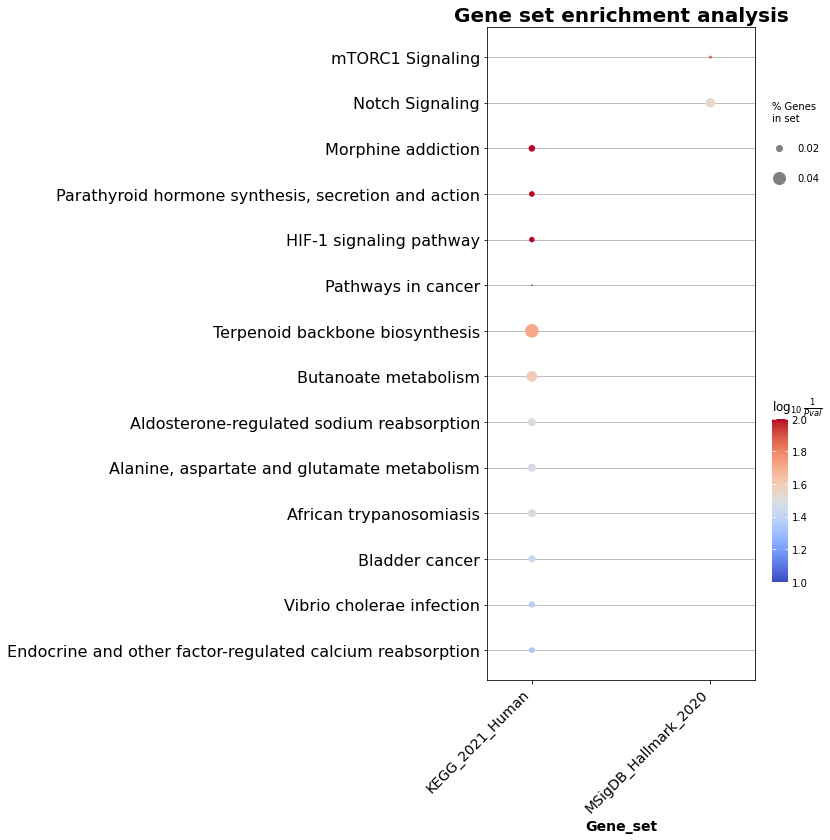

In [62]:
# categorical scatterplot
ax = dotplot(enr_bg.results,
              column="P-value",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=50,
              top_term=20,
              figsize=(6,12),
              title = "Gene set enrichment analysis",
              cmap='coolwarm',
              xticklabels_rot=45, # rotate xtick labels
              show_ring=False, # set to False to revmove outer ring
             )

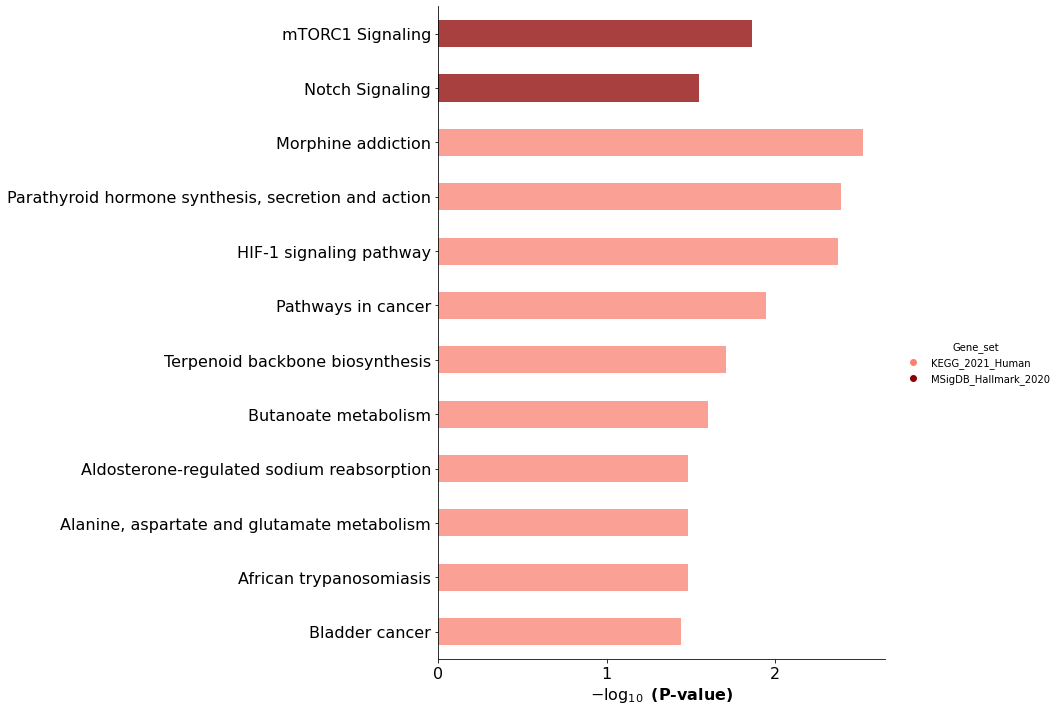

In [63]:
import matplotlib.pyplot as plt
# simple plotting function
from gseapy import barplot, dotplot

ax = barplot(enr_bg.results,
              column="P-value",
              group='Gene_set', # set group, so you could do a multi-sample/library comparsion
              size=10,
              top_term=10,
              figsize=(8,12),
              #color=['darkred', 'darkblue'] # set colors for group
              color = {'KEGG_2021_Human': 'salmon', 'MSigDB_Hallmark_2020':'darkred'}
             )


Main pathway analysis

In [74]:
import os
import pandas as pd
import gwaslab as gl
import pickle
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import chi2_contingency
from tqdm import tqdm
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


# Load the dictionary from the saved file
with open(r'data/biobank/raw_snp_rsid_mapping.pkl', 'rb') as file:
    snps_to_rsid = pickle.load(file)


gwas_df = pd.read_csv(r'data/GWAS/BC_associated_SNPs_GWAS.csv')
gwas_snps = gwas_df['SNPS'].to_list()
# Rename the "Feature_names" column to "ID"
gwas_df.rename(columns={'SNPS': 'ID'}, inplace=True)
gwas_df.rename(columns={'P-VALUE': 'P-values'}, inplace=True)

# step 01: Load the biobank raw genotype data (MAF 0.001) and convert the SNPid to RSids (df)

raw_df = pd.read_pickle('data/biobank/genotype/processed/raw/maf_0.01_hwe_1e-05_r2_0.6.pkl')
raw_df = raw_df.rename(columns=snps_to_rsid)
# Convert column names (except 'SampleID' and 'CaseControl') to object
raw_df.columns = [str(col) if col not in ('SampleID', 'CaseControl') else col for col in raw_df.columns]

# Count columns with the name 'nan'
sum(1 for col in raw_df.columns if col == 'nan')
# Remove columns with the name 'nan'
raw_df = raw_df.drop(columns=['nan'])




# Assuming raw_df is your DataFrame with 'SampleID', 'CaseControl', and SNPs columns
# Separate the features (SNPs) and labels
X = raw_df.drop(columns=['SampleID', 'CaseControl']).values
y = raw_df['CaseControl'].values
feature_names = raw_df.drop(columns=['SampleID', 'CaseControl']).columns.tolist()

# Scale the features using Min-Max scaling
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Initialize lists to store p-values and odds ratios
p_values = []

# Calculate p-values and odds ratios for each feature using chi-squared test
for feature in tqdm(X.T, desc="Calculating p-values and ORs"):  # Transpose X to iterate over columns with progress bar
    contingency_table = pd.crosstab(feature, y)
    chi2, p, _, _ = chi2_contingency(contingency_table)
    p_values.append(p)


# Create a DataFrame with SNPID, P-values, and Odds Ratios
result_df = pd.DataFrame({
    'ID': feature_names,
    'P-values': p_values,
})

# Rename the "Feature_names" column to "ID"
result_df.rename(columns={'SNPID': 'ID'}, inplace=True)

gwas_threshold = 5e-8
# Apply the negative log-10 transformation to p-values
negative_log10_p_values = [-np.log10(p) for p in p_values]
# Assess significance based on the threshold
gwas_significance_values = [p_value <= gwas_threshold for p_value in p_values]
# Print the transformed p-values, variant names, and their significance status
for i, p_value in enumerate(p_values):
    variant_name = feature_names[i]
    #print(f"{variant_name}: -log10(p) = {negative_log10_p_values[i]}, Significant: {gwas_significance_values[i]}")

significant_variants = [feature_names[i] for i, p_value in enumerate(negative_log10_p_values) if p_value >= -np.log10(gwas_threshold)]
bc_snps = list(set(raw_df.columns).intersection(gwas_snps))


main_df = pd.read_csv('biobank_raw_genotype_df.csv')
# Use map function to replace values in the "ID" column and fill NaN with original values
main_df['ID'] = main_df['ID'].map(snps_to_rsid).fillna(main_df['ID'])

main_df.drop_duplicates(subset='ID', keep='first', inplace=True)

main_df = main_df.drop(columns=['ALT_2', 'ALT_3', 'QUAL', 'AN',
       'AC_1', 'AC_2', 'AC_3', 'NS', 'AC_Hom_1', 'AC_Hom_2', 'AC_Hom_3',
       'AC_Het_1', 'AC_Het_2', 'AC_Het_3', 'AC_Hemi_1', 'AC_Hemi_2',
       'AC_Hemi_3', 'AF_1', 'AF_2', 'AF_3', 'MAF_1', 'MAF_2', 'MAF_3', 'HWE_1',
       'HWE_2', 'HWE_3', 'ExcHet_1', 'ExcHet_2', 'ExcHet_3', 'FILTER_PASS',
       'FILTER_FAIL', 'FILTER_axiom_bp', 'numalt', 'altlen_1', 'altlen_2',
       'altlen_3', 'is_snp'])

main_df = main_df.merge(result_df, on='ID')

# Creating a dictionary from gwas_df for mapping
id_pvalue_map = gwas_df.set_index('ID')['P-values'].to_dict()

# Mapping the p-values
main_df['P-values'] = main_df['ID'].map(id_pvalue_map).fillna(main_df['P-values'])

main_df

Calculating p-values and ORs: 100%|██████████| 471634/471634 [23:51<00:00, 329.55it/s]
/var/folders/yk/g9v7r3_s48x_hq34tsyj012m0000gn/T/ipykernel_47698/478309459.py:87: DtypeWarning: Columns (5,6,35) have mixed types. Specify dtype option on import or set low_memory=False.
  main_df = pd.read_csv('biobank_raw_genotype_df.csv')


,CHROM,POS,ID,REF,ALT_1,P-values
0,1,792461,rs116587930,G,A,0.795074
1,1,813107,rs184255501,T,C,1.000000
2,1,833068,rs12562034,G,A,0.625112
3,1,837744,rs142049927,T,C,0.162335
4,1,843942,rs4040617,A,G,0.832323
...,...,...,...,...,...,...
431010,13,98704358,rs1339067,A,G,0.155105
431011,19,16688249,rs34995930,G,A,0.802530
431012,19,38304947,rs76762399,A,G,0.430890
431013,19,52949838,rs138244668,C,T,0.466123


In [75]:
import gwaslab as gl

mysumstats = gl.Sumstats(main_df, snpid="ID", chrom='CHROM', pos='POS', ea='ALT_1', nea='REF',  p='P-values', sep="\t")
snp_to_gene = mysumstats.get_lead(anno=True, build="38", sig_level= 5e-8) #(GRCh38/hg38)

genes = snp_to_gene['GENE'].unique()
genes = genes.tolist()

2024/10/10 14:09:49 GWASLab v3.4.46 https://cloufield.github.io/gwaslab/
2024/10/10 14:09:49 (C) 2022-2024, Yunye He, Kamatani Lab, MIT License, gwaslab@gmail.com
2024/10/10 14:09:49 Start to initialize gl.Sumstats from pandas DataFrame ...
2024/10/10 14:09:50  -Reading columns          : P-values,CHROM,ID,ALT_1,POS,REF
2024/10/10 14:09:50  -Renaming columns to      : P,CHR,SNPID,EA,POS,NEA
2024/10/10 14:09:50  -Current Dataframe shape : 431015  x  6
2024/10/10 14:09:50  -Initiating a status column: STATUS ...
2024/10/10 14:09:50  #WARNING! Version of genomic coordinates is unknown...
2024/10/10 14:09:50 Start to reorder the columns...v3.4.46
2024/10/10 14:09:50  -Current Dataframe shape : 431015 x 7 ; Memory usage: 38.85 MB
2024/10/10 14:09:50  -Reordering columns to    : SNPID,CHR,POS,EA,NEA,P,STATUS
2024/10/10 14:09:50 Finished reordering the columns.
2024/10/10 14:09:50  -Column  : SNPID  CHR    POS   EA       NEA      P       STATUS  
2024/10/10 14:09:50  -DType   : object string 

In [76]:
len(genes)

1179

In [77]:
genes2 = ['PEX14', 'DCLRE1B', 'NOTCH2', 'SRGAP2C', 'RNF115', 'LGR6', 'MDM4',
       'EXO1', 'OSR1', 'BCL2L11', 'INHBB', 'CDCA7', 'TNP1', 'ITPR1',
       'SLC4A7', 'TGFBR2', 'MYL3', 'NELFA', 'TET2', 'ADAM29', 'TERT',
       'MARCHF11', 'SUB1', 'MRPS30', 'MAP3K1', 'PDE4D', 'ARRDC3', 'EBF1',
       'FOXQ1', 'RANBP9', 'H2BC6', 'TENT5A', 'CCDC170', 'MKLN1',
       'ARHGEF5', 'DUSP4', 'KCNU1', 'HNF4G', 'TRPS1', 'POU5F1B', 'MYC',
       'CDKN2B', 'KLF4', 'MLLT10', '', 'ZMIZ1', 'TCF7L2', 'FGFR2', 'LSP1',
       'SLC1A2', 'CFL1', 'CCND1', 'BARX2', 'ATF7IP', 'SLCO1B1', 'PTHLH',
       'NTN4', 'HNF1A', 'KLF12', 'RAD51B', 'CCDC88C', 'RIN3', 'TOX3',
       'FTO', 'CDYL2', 'C16orf95', 'JUP', 'STXBP4', 'CBX8', 'AQP4',
       'SETBP1', 'BABAM1,USHBP1', 'ELL', 'CYP2A6', 'KCNN4', 'RALY',
       'NRIP1', 'XPNPEP3', 'XRCC6']

In [78]:
genes = genes + genes2

In [79]:
# simple plotting function
import os
# %matplotlib inline
# %config InlineBackend.figure_format='retina' # mac
%load_ext autoreload
%autoreload 2
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt
# simple plotting function
from gseapy import barplot, dotplot

# backgound only reconigized a gene list input.
enr_bg = gp.enrichr(gene_list=genes,
                 gene_sets=['MSigDB_Hallmark_2020','KEGG_2021_Human'],
                 organism='human', # organism argment is ignored because user input a background
                 outdir=None, # don't write to disk
                )


enr_bg.results


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,MSigDB_Hallmark_2020,UV Response Dn,24/144,0.000005,0.000240,0,0,3.179745,38.936587,NOTCH2;SMAD3;WDR37;YTHDC1;MGMT;PRKCE;COL11A1;M...
1,MSigDB_Hallmark_2020,Epithelial Mesenchymal Transition,23/200,0.002074,0.051842,0,0,2.057881,12.714474,NOTCH2;JUN;PCOLCE2;LAMA1;COL11A1;NTM;COL12A1;V...
2,MSigDB_Hallmark_2020,TNF-alpha Signaling via NF-kB,22/200,0.004406,0.055079,0,0,1.955581,10.608458,DUSP4;JUN;EDN1;BTG1;SMAD3;GCH1;IRS2;KLF4;SERPI...
3,MSigDB_Hallmark_2020,Glycolysis,22/200,0.004406,0.055079,0,0,1.955581,10.608458,EGLN3;GOT2;B3GAT1;COG2;CXCR4;PLOD2;IRS2;MIF;NO...
4,MSigDB_Hallmark_2020,KRAS Signaling Up,20/200,0.017291,0.172908,0,0,1.754877,7.120560,CBX8;PTPRR;MAP3K1;JUP;USP12;CXCR4;KLF4;ETS1;GA...
...,...,...,...,...,...,...,...,...,...,...
338,KEGG_2021_Human,Spliceosome,3/150,0.994853,0.999991,0,0,0.318306,0.001642,TRA2B;SRSF5;SRSF8
339,KEGG_2021_Human,Alcoholism,4/186,0.996490,0.999991,0,0,0.342434,0.001204,H4C8;H2BC6;CREB3L2;CREB5
340,KEGG_2021_Human,RNA transport,3/186,0.999188,0.999991,0,0,0.255195,0.000207,NUP210;PABPC4L;NUP35
341,KEGG_2021_Human,Ribosome,2/158,0.999383,0.999991,0,0,0.199698,0.000123,RPL3;RPS24


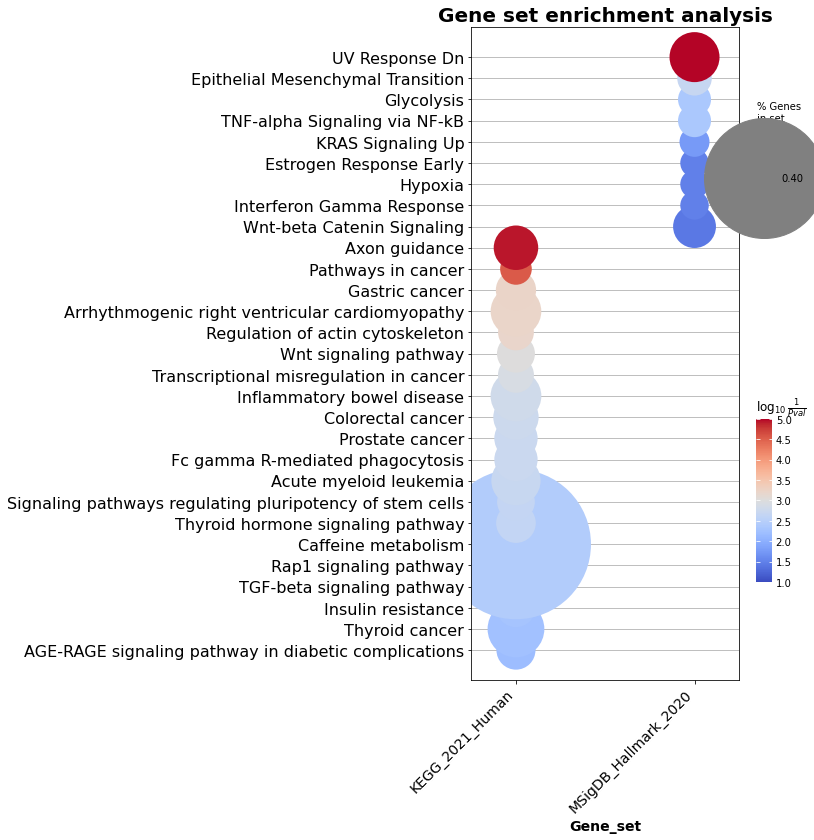

In [80]:
# categorical scatterplot
ax = dotplot(enr_bg.results,
              column="P-value",
              x='Gene_set', # set x axis, so you could do a multi-sample/library comparsion
              size=50,
              top_term=20,
              figsize=(6,12),
              title = "Gene set enrichment analysis",
              cmap='coolwarm',
              xticklabels_rot=45, # rotate xtick labels
              show_ring=False, # set to False to revmove outer ring
             )

In [81]:
enr_bg.results.to_csv("final_pathway_results.csv", header=True, index=False)

In [1]:
import pandas as pd

df = pd.read_csv("final_pathway_results.csv")
df.columns

Index(['Gene_set', 'Term', 'Overlap', 'P-value', 'Adjusted P-value',
       'Old P-value', 'Old Adjusted P-value', 'Odds Ratio', 'Combined Score',
       'Genes'],
      dtype='object')

In [2]:
df

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,MSigDB_Hallmark_2020,UV Response Dn,24/144,0.000005,0.000240,0,0,3.179745,38.936587,NOTCH2;SMAD3;WDR37;YTHDC1;MGMT;PRKCE;COL11A1;M...
1,MSigDB_Hallmark_2020,Epithelial Mesenchymal Transition,23/200,0.002074,0.051842,0,0,2.057881,12.714474,NOTCH2;JUN;PCOLCE2;LAMA1;COL11A1;NTM;COL12A1;V...
2,MSigDB_Hallmark_2020,TNF-alpha Signaling via NF-kB,22/200,0.004406,0.055079,0,0,1.955581,10.608458,DUSP4;JUN;EDN1;BTG1;SMAD3;GCH1;IRS2;KLF4;SERPI...
3,MSigDB_Hallmark_2020,Glycolysis,22/200,0.004406,0.055079,0,0,1.955581,10.608458,EGLN3;GOT2;B3GAT1;COG2;CXCR4;PLOD2;IRS2;MIF;NO...
4,MSigDB_Hallmark_2020,KRAS Signaling Up,20/200,0.017291,0.172908,0,0,1.754877,7.120560,CBX8;PTPRR;MAP3K1;JUP;USP12;CXCR4;KLF4;ETS1;GA...
...,...,...,...,...,...,...,...,...,...,...
338,KEGG_2021_Human,Spliceosome,3/150,0.994853,0.999991,0,0,0.318306,0.001642,TRA2B;SRSF5;SRSF8
339,KEGG_2021_Human,Alcoholism,4/186,0.996490,0.999991,0,0,0.342434,0.001204,H4C8;H2BC6;CREB3L2;CREB5
340,KEGG_2021_Human,RNA transport,3/186,0.999188,0.999991,0,0,0.255195,0.000207,NUP210;PABPC4L;NUP35
341,KEGG_2021_Human,Ribosome,2/158,0.999383,0.999991,0,0,0.199698,0.000123,RPL3;RPS24


In [3]:
kegg_df = df[df['Gene_set']=='KEGG_2021_Human']
kegg_df

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
50,KEGG_2021_Human,Axon guidance,27/182,0.000012,0.003502,0,0,2.771342,31.412320,SEMA5A;ROBO2;GSK3B;NTN4;CXCR4;PIK3R1;EFNA5;ROB...
51,KEGG_2021_Human,Pathways in cancer,56/531,0.000028,0.004163,0,0,1.890235,19.788011,ALK;GSK3B;BRCA2;ETS1;GLI3;IGF1R;FGF9;CCND1;MYC...
52,KEGG_2021_Human,Gastric cancer,20/149,0.000596,0.037610,0,0,2.455372,18.233774,GSK3B;TCF7L2;CDKN2B;SMAD3;WNT5B;JUP;WNT7B;LEF1...
53,KEGG_2021_Human,Arrhythmogenic right ventricular cardiomyopathy,13/77,0.000615,0.037610,0,0,3.209067,23.727270,TCF7L2;JUP;LAMA1;LEF1;CACNA2D3;CACNA1C;SLC8A1;...
54,KEGG_2021_Human,Regulation of actin cytoskeleton,26/218,0.000642,0.037610,0,0,2.148311,15.792690,PDGFA;CXCR4;PIK3R1;WASL;IQGAP2;KNG1;FGD3;ACTR3...
...,...,...,...,...,...,...,...,...,...,...
338,KEGG_2021_Human,Spliceosome,3/150,0.994853,0.999991,0,0,0.318306,0.001642,TRA2B;SRSF5;SRSF8
339,KEGG_2021_Human,Alcoholism,4/186,0.996490,0.999991,0,0,0.342434,0.001204,H4C8;H2BC6;CREB3L2;CREB5
340,KEGG_2021_Human,RNA transport,3/186,0.999188,0.999991,0,0,0.255195,0.000207,NUP210;PABPC4L;NUP35
341,KEGG_2021_Human,Ribosome,2/158,0.999383,0.999991,0,0,0.199698,0.000123,RPL3;RPS24


/var/folders/yk/g9v7r3_s48x_hq34tsyj012m0000gn/T/ipykernel_56071/3970846618.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10', len(pathway_terms))  # Using a colormap with distinct colors


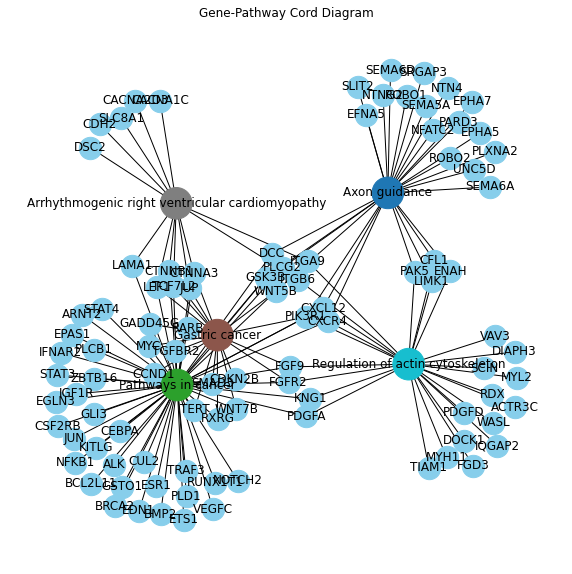

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib import cm


# Create a DataFrame
df = kegg_df.head(5)

# Create a graph
G = nx.Graph()

# Add nodes for genes and pathways
for index, row in df.iterrows():
    pathway = row["Term"]
    genes = row["Genes"].split(';')
    for gene in genes:
        G.add_node(gene, type="gene")
        G.add_node(pathway, type="pathway")
        G.add_edge(gene, pathway)

# Assign different colors for pathways
pathway_terms = df['Term'].unique()
colors = cm.get_cmap('tab10', len(pathway_terms))  # Using a colormap with distinct colors
pathway_color_map = {pathway: colors(i) for i, pathway in enumerate(pathway_terms)}

# Draw the graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, seed=42)  # Position nodes using a force-directed layout

# Draw nodes
gene_nodes = [node for node, attr in G.nodes(data=True) if attr['type'] == 'gene']
pathway_nodes = [node for node, attr in G.nodes(data=True) if attr['type'] == 'pathway']

nx.draw_networkx_nodes(G, pos, nodelist=gene_nodes, node_color='skyblue', node_size=500, label="Genes")
nx.draw_networkx_nodes(G, pos, nodelist=pathway_nodes, node_color=[pathway_color_map[p] for p in pathway_nodes], node_size=1000, label="Pathways")

# Draw edges
nx.draw_networkx_edges(G, pos)

# Add labels
nx.draw_networkx_labels(G, pos)


# Save the graph as a GraphML file
nx.write_graphml(G, "kegg_pathways_networks.graphml")

# Show plot
plt.title('Gene-Pathway Cord Diagram')
plt.axis('off')
plt.show()
